this is experimental seeing if i can get the accuracy to improve

Loss actually tracks the inverse-confidence (for want of a better word) of the prediction. A high Loss score indicates that, even when the model is making good predictions, it is less sure of the predictions it is making...and vice-versa.

In [1]:
#importing tenserflow to create the neural networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import LeakyReLU
import pandas as p
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
data = p.read_csv('.\clean_data\creditcard_application_clean_data.csv')
train, test = train_test_split(data, test_size=0.2)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

smote = SMOTE(random_state=31)
x_train_s, y_train_s = smote.fit_resample(x_train,y_train)

# ros = RandomOverSampler(random_state=42)
# X_train_r, y_train_r = ros.fit_resample(x_train, y_train)
# print('Resampled dataset shape %s' % Counter(y_train_s))


In [ ]:
def printGraph(title, hist, leg_loc='lower right'):
    acc = hist.history['accuracy']
    val = hist.history['val_accuracy']
    loss = hist.history['loss']
    loss_val = hist.history['val_loss']

    epochs = range(1, len(acc) + 1)
 
    plt.plot(epochs, acc, '-', label='Training accuracy')
    plt.plot(epochs, val, ':', label='Validation accuracy')
    plt.plot(epochs, loss_val, ':', label='Validation loss')
    plt.plot(epochs, loss, '-', label="Loss")
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc=leg_loc)
    plt.grid(linestyle='-',  color='black', visible=True)
    plt.plot()

def printConfusionMatrix(model, X_test, Y_test, name='model'):
    y_predicted = model.predict(X_test) > 0.5
    mat = confusion_matrix(Y_test, y_predicted)
    labels = ['ACCEPTED', 'DENIED']
 
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

    plt.title(name + " confusion_matrix ")
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')

In [3]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=2)
model_3_a = keras.Sequential(
    [
        layers.Dense(32, activation="relu", name="layer_A"),
        layers.Dense(32, activation="relu", name="layer_B"),
        layers.Dense(32, activation="relu", name="layer_C"),
        layers.Dense(32, activation="relu", name="layer_D"),
        layers.Dense(32, activation="relu", name="layer_E"),
        layers.Dense(32, activation="relu", name="layer_F"),
        layers.Dense(32, activation="relu", name="layer_G"),
        layers.Dense(1, activation="sigmoid")
    ]
)
model_3_b = keras.Sequential(
    [
        layers.Dense(32, activation="relu", name="layer_A"),
        layers.Dense(16, activation="relu", name="layer_B"),
        layers.Dense(8, activation="relu", name="layer_C"),
        layers.Dense(16, activation="relu", name="layer_D"),
        layers.Dense(32, activation="relu", name="layer_E"),
        layers.Dense(16, activation="relu", name="layer_F"),
        layers.Dense(8, activation="relu", name="layer_G"),
        layers.Dense(1, activation="sigmoid")
    ]
)

#is the best perfoming one out of the many
#3 hidden layers
model_3_c_1 = keras.Sequential(
    [
        layers.Dense(256, activation="relu", name="layer_A"),
        layers.Dense(256, activation="relu", name="layer_B"),
        layers.Dense(256, activation="relu", name="layer_C"),
        layers.Dense(1, activation="sigmoid")
    ]
)
# from the 3 c models, model 2 was the best performing
#5 hidden layers
model_3_c_2 = keras.Sequential(
    [
        layers.Dense(256, activation="relu", name="layer_A"),
        layers.Dense(256, activation="relu", name="layer_B"),
        layers.Dense(256, activation="relu", name="layer_C"),
        layers.Dense(256, activation="relu", name="layer_D"),
        layers.Dense(256, activation="relu", name="layer_E"),
        layers.Dense(1, activation="sigmoid")
    ]
)
#5 hidden layers
model_3_c_2_leaky = keras.Sequential(
    [
        layers.Dense(256, activation=keras.layers.LeakyReLU(), name="layer_A"),
        layers.Dense(256, activation=keras.layers.LeakyReLU(), name="layer_B"),
        layers.Dense(256, activation=keras.layers.LeakyReLU(), name="layer_C"),
        layers.Dense(256, activation=keras.layers.LeakyReLU(), name="layer_D"),
        layers.Dense(256, activation=keras.layers.LeakyReLU(), name="layer_E"),
        layers.Dense(1, activation="sigmoid")
    ]
)

#has 6 hidden layers
model_3_c_2_a = keras.Sequential(
    [
        layers.Dense(256, activation="relu", name="layer_A"),
        layers.Dense(256, activation="relu", name="layer_B"),
        layers.Dense(256, activation="relu", name="layer_C"),
        layers.Dense(256, activation="relu", name="layer_D"),
        layers.Dense(256, activation="relu", name="layer_E"),
        layers.Dense(256, activation="relu", name="layer_F"),
        layers.Dense(1, activation="sigmoid")
    ]
)
#has 9 hidden layers
model_3_c_2_b = keras.Sequential(
    [
        layers.Dense(256, activation="relu", name="layer_A"),
        layers.Dense(256, activation="relu", name="layer_B"),
        layers.Dense(256, activation="relu", name="layer_C"),
        layers.Dense(256, activation="relu", name="layer_D"),
        layers.Dense(256, activation="relu", name="layer_E"),
        layers.Dense(256, activation="relu", name="layer_F"),
        layers.Dense(256, activation="relu", name="layer_G"),
        layers.Dense(256, activation="relu", name="layer_H"),
        layers.Dense(256, activation="relu", name="layer_I"),
        layers.Dense(1, activation="sigmoid")
    ]
)

#4 hidden layers with many nodes
model_3_c_3 = keras.Sequential(
    [
        layers.Dense(512, activation="relu", name="layer_A"),
        layers.Dense(512, activation="relu", name="layer_B"),
        layers.Dense(256, activation="relu", name="layer_C"),
        layers.Dense(64, activation="relu", name="layer_D"),
        layers.Dense(1, activation="sigmoid")
    ]
)

model_3_a.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model_3_b.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model_3_c_1.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model_3_c_2.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

model_3_c_2_leaky.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model_3_c_2_a.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model_3_c_2_b.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

model_3_c_3.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [4]:
#fiting the first NN
hist_a = model_3_a.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
403/403 [==============================] - 2s 2ms/step - loss: 0.6910 - accuracy: 0.5225 - val_loss: 0.7108 - val_accuracy: 0.4443
Epoch 2/200
403/403 [==============================] - 1s 2ms/step - loss: 0.6863 - accuracy: 0.5414 - val_loss: 0.6790 - val_accuracy: 0.6509
Epoch 3/200
403/403 [==============================] - 1s 2ms/step - loss: 0.6813 - accuracy: 0.5502 - val_loss: 0.7106 - val_accuracy: 0.4102
Epoch 4/200
403/403 [==============================] - 1s 2ms/step - loss: 0.6773 - accuracy: 0.5598 - val_loss: 0.6603 - val_accuracy: 0.6348
Epoch 5/200
403/403 [==============================] - 1s 2ms/step - loss: 0.6729 - accuracy: 0.5644 - val_loss: 0.6723 - val_accuracy: 0.5968
Epoch 6/200
403/403 [==============================] - 1s 2ms/step - loss: 0.6699 - accuracy: 0.5694 - val_loss: 0.6608 - val_accuracy: 0.6478
Epoch 7/200
403/403 [==============================] - 1s 2ms/step - loss: 0.6655 - accuracy: 0.5779 - val_loss: 0.6664 - val_accuracy: 0.6434

[]

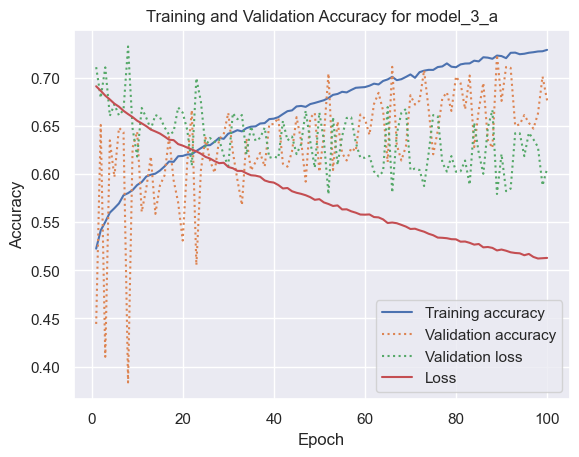

In [5]:
printGraph()

228/228 [==============================] - 0s 876us/step


Text(110.44999999999997, 0.5, 'Actual label')

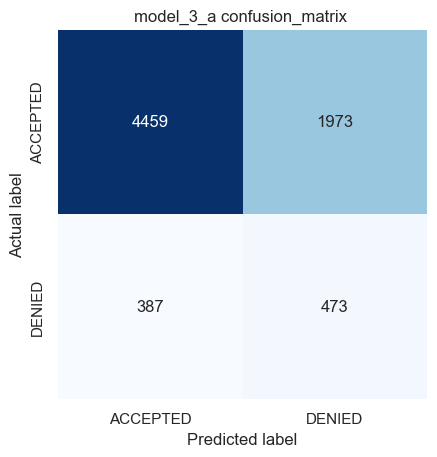

In [6]:
y_predicted = model_3_a.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model_3_a confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [7]:
hist_b = model_3_b.fit(x_train_s,y_train_s, epochs=50, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/50
403/403 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5234 - val_loss: 0.7043 - val_accuracy: 0.5178
Epoch 2/50
403/403 [==============================] - 1s 2ms/step - loss: 0.6857 - accuracy: 0.5467 - val_loss: 0.6825 - val_accuracy: 0.5809
Epoch 3/50
403/403 [==============================] - 1s 2ms/step - loss: 0.6810 - accuracy: 0.5558 - val_loss: 0.6929 - val_accuracy: 0.5806
Epoch 4/50
403/403 [==============================] - 1s 2ms/step - loss: 0.6767 - accuracy: 0.5650 - val_loss: 0.6983 - val_accuracy: 0.5764
Epoch 5/50
403/403 [==============================] - 1s 3ms/step - loss: 0.6730 - accuracy: 0.5696 - val_loss: 0.6805 - val_accuracy: 0.6270
Epoch 6/50
403/403 [==============================] - 1s 2ms/step - loss: 0.6693 - accuracy: 0.5780 - val_loss: 0.6305 - val_accuracy: 0.7106
Epoch 7/50
403/403 [==============================] - 1s 2ms/step - loss: 0.6667 - accuracy: 0.5805 - val_loss: 0.6812 - val_accuracy: 0.5237
Epoch 

[]

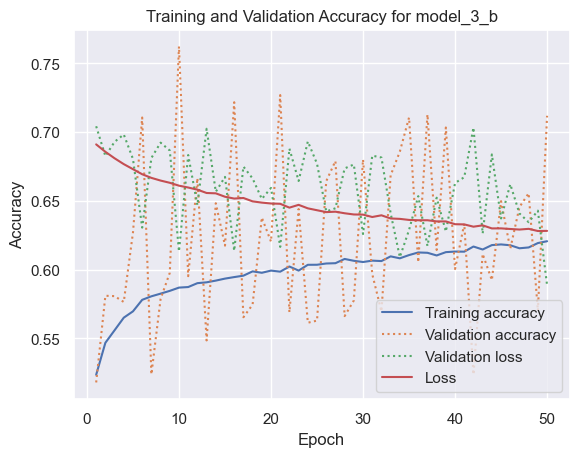

In [8]:
sns.set()
 
acc = hist_b.history['accuracy']
val = hist_b.history['val_accuracy']
loss = hist_b.history['loss']
loss_val = hist_b.history['val_loss']

epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, loss_val, ':', label='Validation loss')
plt.plot(epochs, loss, '-', label="Loss")
plt.title('Training and Validation Accuracy for model_3_b')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

228/228 [==============================] - 0s 1ms/step


Text(110.44999999999997, 0.5, 'Actual label')

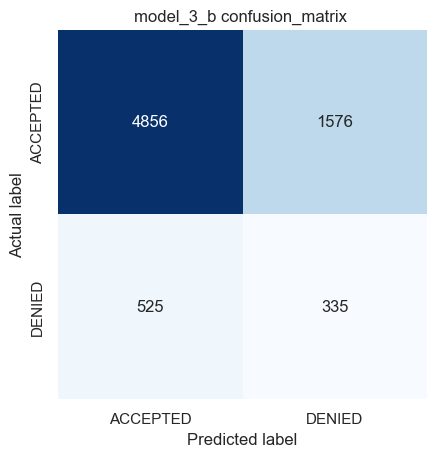

In [9]:
y_predicted = model_3_b.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model_3_b confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [10]:
hist_c = model_3_c_1.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
403/403 [==============================] - 2s 4ms/step - loss: 0.6896 - accuracy: 0.5308 - val_loss: 0.7170 - val_accuracy: 0.4157
Epoch 2/200
403/403 [==============================] - 2s 4ms/step - loss: 0.6812 - accuracy: 0.5485 - val_loss: 0.6698 - val_accuracy: 0.5477
Epoch 3/200
403/403 [==============================] - 1s 3ms/step - loss: 0.6744 - accuracy: 0.5603 - val_loss: 0.6745 - val_accuracy: 0.5472
Epoch 4/200
403/403 [==============================] - 1s 3ms/step - loss: 0.6662 - accuracy: 0.5711 - val_loss: 0.7168 - val_accuracy: 0.4604
Epoch 5/200
403/403 [==============================] - 2s 4ms/step - loss: 0.6600 - accuracy: 0.5802 - val_loss: 0.6684 - val_accuracy: 0.5869
Epoch 6/200
403/403 [==============================] - 1s 3ms/step - loss: 0.6538 - accuracy: 0.5866 - val_loss: 0.6836 - val_accuracy: 0.5396
Epoch 7/200
403/403 [==============================] - 2s 5ms/step - loss: 0.6478 - accuracy: 0.5956 - val_loss: 0.6650 - val_accuracy: 0.5885

[]

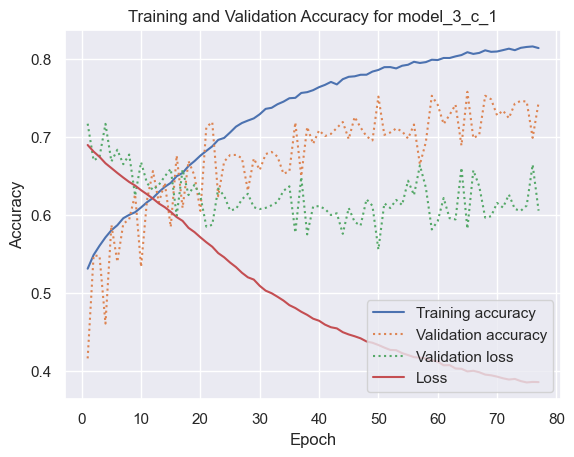

In [11]:
sns.set()
 
acc = hist_c.history['accuracy']
val = hist_c.history['val_accuracy']
loss = hist_c.history['loss']
loss_val = hist_c.history['val_loss']

epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, loss_val, ':', label='Validation loss')
plt.plot(epochs, loss, '-', label="Loss")
plt.title('Training and Validation Accuracy for model_3_c_1')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

228/228 [==============================] - 0s 1ms/step


Text(110.44999999999997, 0.5, 'Actual label')

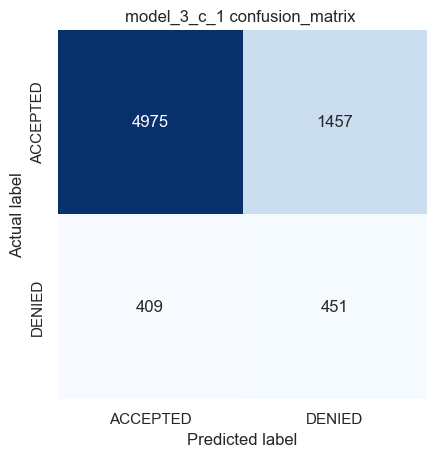

In [12]:
y_predicted = model_3_c_1.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model_3_c_1 confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [13]:
hist_c_2 = model_3_c_2.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
403/403 [==============================] - 3s 5ms/step - loss: 0.6913 - accuracy: 0.5188 - val_loss: 0.6891 - val_accuracy: 0.5572
Epoch 2/200
403/403 [==============================] - 2s 6ms/step - loss: 0.6842 - accuracy: 0.5403 - val_loss: 0.6771 - val_accuracy: 0.5191
Epoch 3/200
403/403 [==============================] - 2s 5ms/step - loss: 0.6747 - accuracy: 0.5599 - val_loss: 0.6782 - val_accuracy: 0.5369
Epoch 4/200
403/403 [==============================] - 2s 4ms/step - loss: 0.6675 - accuracy: 0.5721 - val_loss: 0.6725 - val_accuracy: 0.5064
Epoch 5/200
403/403 [==============================] - 2s 4ms/step - loss: 0.6602 - accuracy: 0.5797 - val_loss: 0.6577 - val_accuracy: 0.5706
Epoch 6/200
403/403 [==============================] - 2s 5ms/step - loss: 0.6540 - accuracy: 0.5867 - val_loss: 0.6886 - val_accuracy: 0.4713
Epoch 7/200
403/403 [==============================] - 2s 4ms/step - loss: 0.6470 - accuracy: 0.5963 - val_loss: 0.6539 - val_accuracy: 0.6083

[]

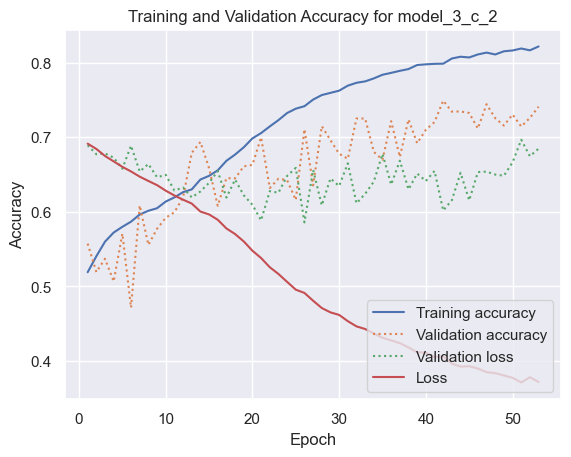

In [14]:
sns.set()
 
acc = hist_c_2.history['accuracy']
val = hist_c_2.history['val_accuracy']
loss = hist_c_2.history['loss']
loss_val = hist_c_2.history['val_loss']

epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, loss_val, ':', label='Validation loss')
plt.plot(epochs, loss, '-', label="Loss")
plt.title('Training and Validation Accuracy for model_3_c_2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

228/228 [==============================] - 0s 1ms/step


Text(110.44999999999997, 0.5, 'Actual label')

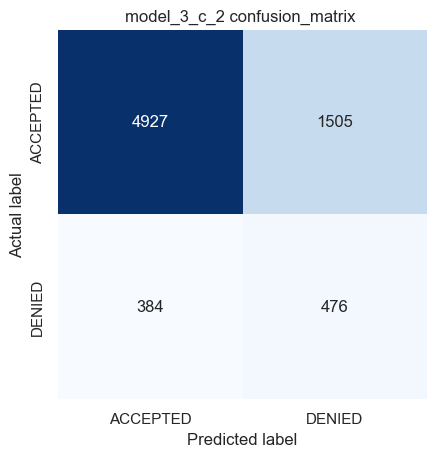

In [15]:
y_predicted = model_3_c_2.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model_3_c_2 confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [16]:
hist_c_3 = model_3_c_3.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
403/403 [==============================] - 5s 10ms/step - loss: 0.6896 - accuracy: 0.5305 - val_loss: 0.6275 - val_accuracy: 0.6485
Epoch 2/200
403/403 [==============================] - 4s 10ms/step - loss: 0.6809 - accuracy: 0.5505 - val_loss: 0.6883 - val_accuracy: 0.4812
Epoch 3/200
403/403 [==============================] - 4s 10ms/step - loss: 0.6725 - accuracy: 0.5644 - val_loss: 0.6451 - val_accuracy: 0.6838
Epoch 4/200
403/403 [==============================] - 4s 9ms/step - loss: 0.6663 - accuracy: 0.5741 - val_loss: 0.6306 - val_accuracy: 0.6906
Epoch 5/200
403/403 [==============================] - 3s 8ms/step - loss: 0.6594 - accuracy: 0.5802 - val_loss: 0.6407 - val_accuracy: 0.6119
Epoch 6/200
403/403 [==============================] - 3s 9ms/step - loss: 0.6518 - accuracy: 0.5918 - val_loss: 0.6184 - val_accuracy: 0.6558
Epoch 7/200
403/403 [==============================] - 4s 9ms/step - loss: 0.6440 - accuracy: 0.5971 - val_loss: 0.6521 - val_accuracy: 0.5

[]

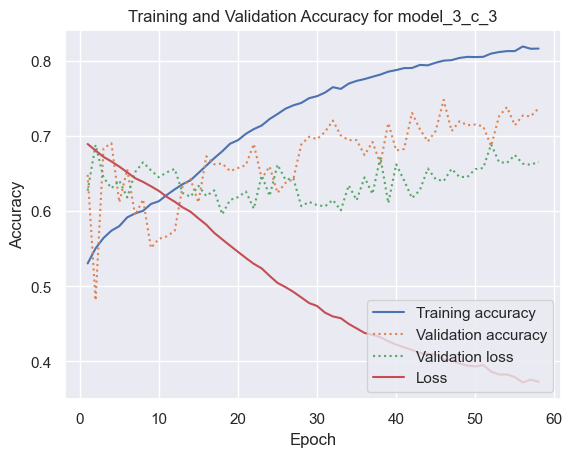

In [17]:
sns.set()
 
acc = hist_c_3.history['accuracy']
val = hist_c_3.history['val_accuracy']
loss = hist_c_3.history['loss']
loss_val = hist_c_3.history['val_loss']

epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, loss_val, ':', label='Validation loss')
plt.plot(epochs, loss, '-', label="Loss")
plt.title('Training and Validation Accuracy for model_3_c_3')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

228/228 [==============================] - 1s 2ms/step


Text(110.44999999999997, 0.5, 'Actual label')

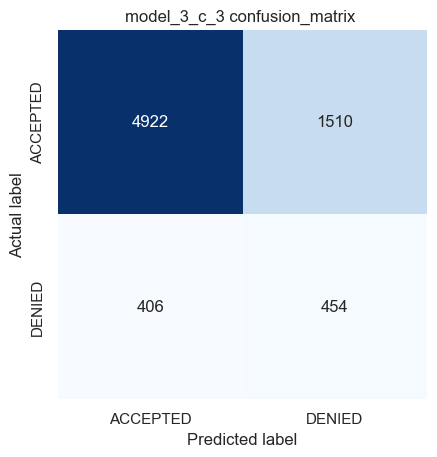

In [18]:
y_predicted = model_3_c_3.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model_3_c_3 confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

From the previous runs, model_3_c_2 was the best performing 

(this was from a previous run, may be diffrent than final run)

loss: 0.3392 - accuracy: 0.8387 - val_loss: 0.7488 - val_accuracy: 0.7408

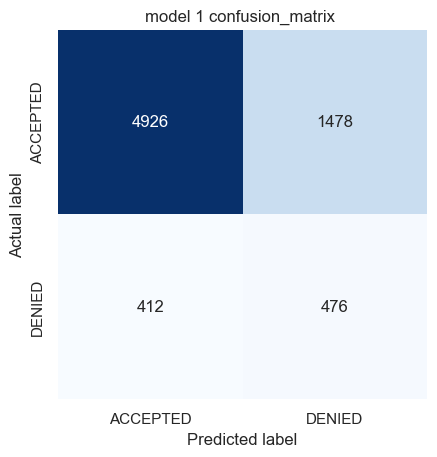




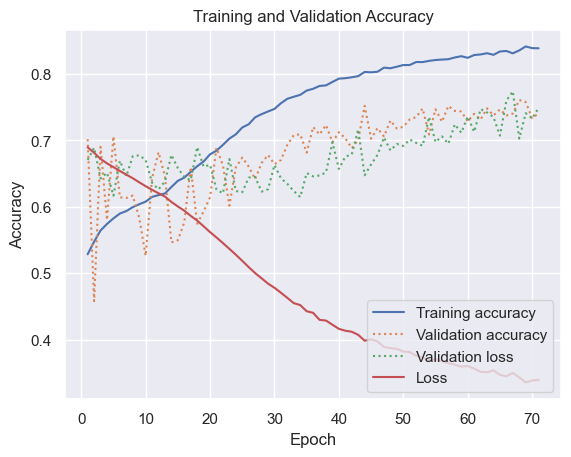

In [19]:
#testing with diffrent activation method, changed from relu to leaky relu
hist_leaky = model_3_c_2_leaky.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
403/403 [==============================] - 3s 6ms/step - loss: 0.6923 - accuracy: 0.5165 - val_loss: 0.5792 - val_accuracy: 0.8674
Epoch 2/200
403/403 [==============================] - 2s 5ms/step - loss: 0.6896 - accuracy: 0.5261 - val_loss: 0.6883 - val_accuracy: 0.6061
Epoch 3/200
403/403 [==============================] - 2s 5ms/step - loss: 0.6864 - accuracy: 0.5319 - val_loss: 0.6744 - val_accuracy: 0.5893
Epoch 4/200
403/403 [==============================] - 2s 6ms/step - loss: 0.6829 - accuracy: 0.5450 - val_loss: 0.6926 - val_accuracy: 0.4372
Epoch 5/200
403/403 [==============================] - 3s 6ms/step - loss: 0.6805 - accuracy: 0.5461 - val_loss: 0.6750 - val_accuracy: 0.5731
Epoch 6/200
403/403 [==============================] - 2s 6ms/step - loss: 0.6762 - accuracy: 0.5587 - val_loss: 0.6844 - val_accuracy: 0.4236
Epoch 7/200
403/403 [==============================] - 2s 5ms/step - loss: 0.6735 - accuracy: 0.5603 - val_loss: 0.7130 - val_accuracy: 0.3605

[]

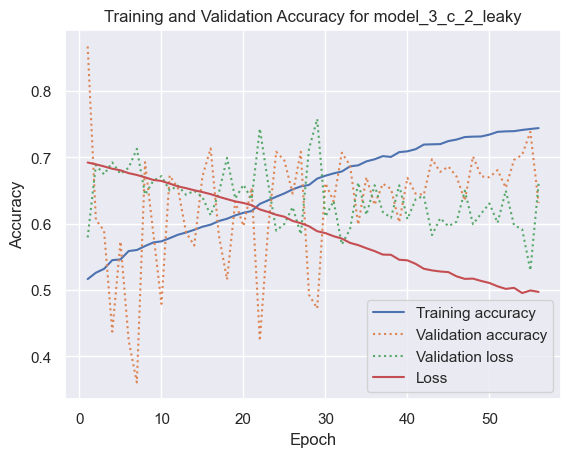

In [20]:
sns.set()
 
acc = hist_leaky.history['accuracy']
val = hist_leaky.history['val_accuracy']
loss = hist_leaky.history['loss']
loss_val = hist_leaky.history['val_loss']

epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, loss_val, ':', label='Validation loss')
plt.plot(epochs, loss, '-', label="Loss")
plt.title('Training and Validation Accuracy for model_3_c_2_leaky')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()


228/228 [==============================] - 0s 2ms/step


Text(110.44999999999997, 0.5, 'Actual label')

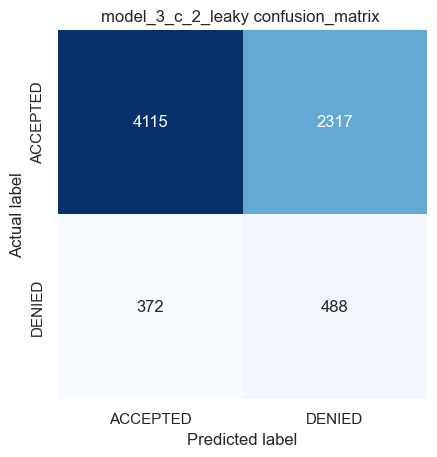

In [21]:


y_predicted = model_3_c_2_leaky.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model_3_c_2_leaky confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [22]:
hist_3_c_2_a = model_3_c_2_a.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
403/403 [==============================] - 4s 5ms/step - loss: 0.6909 - accuracy: 0.5193 - val_loss: 0.6731 - val_accuracy: 0.5976
Epoch 2/200
403/403 [==============================] - 2s 5ms/step - loss: 0.6847 - accuracy: 0.5404 - val_loss: 0.6094 - val_accuracy: 0.8243
Epoch 3/200
403/403 [==============================] - 2s 5ms/step - loss: 0.6760 - accuracy: 0.5568 - val_loss: 0.7566 - val_accuracy: 0.4804
Epoch 4/200
403/403 [==============================] - 3s 7ms/step - loss: 0.6695 - accuracy: 0.5677 - val_loss: 0.6849 - val_accuracy: 0.5280
Epoch 5/200
403/403 [==============================] - 3s 6ms/step - loss: 0.6653 - accuracy: 0.5735 - val_loss: 0.6493 - val_accuracy: 0.7440
Epoch 6/200
403/403 [==============================] - 2s 6ms/step - loss: 0.6568 - accuracy: 0.5850 - val_loss: 0.6711 - val_accuracy: 0.6009
Epoch 7/200
403/403 [==============================] - 2s 6ms/step - loss: 0.6498 - accuracy: 0.5912 - val_loss: 0.7276 - val_accuracy: 0.4501

[]

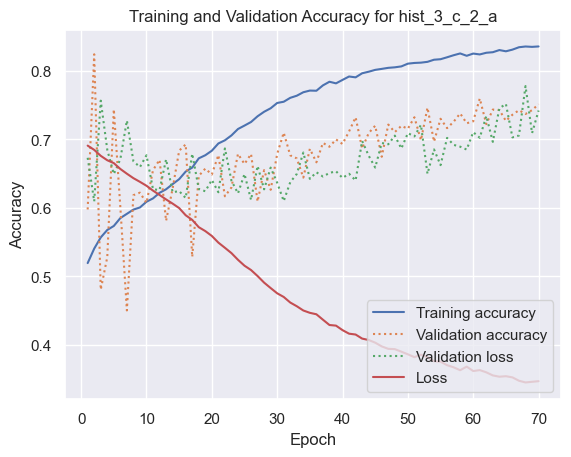

In [23]:
sns.set()
 
acc = hist_3_c_2_a.history['accuracy']
val = hist_3_c_2_a.history['val_accuracy']
loss = hist_3_c_2_a.history['loss']
loss_val = hist_3_c_2_a.history['val_loss']

epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, loss_val, ':', label='Validation loss')
plt.plot(epochs, loss, '-', label="Loss")
plt.title('Training and Validation Accuracy for hist_3_c_2_a')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()


228/228 [==============================] - 0s 1ms/step


Text(110.44999999999997, 0.5, 'Actual label')

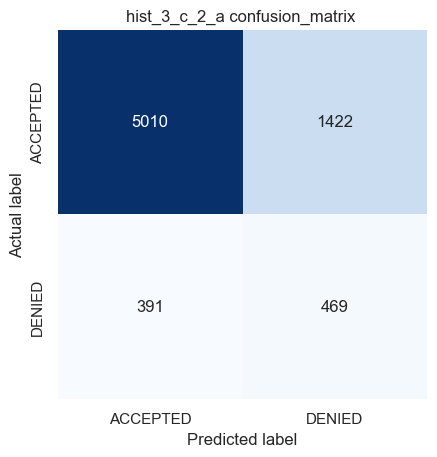

In [24]:
y_predicted = model_3_c_2_a.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("hist_3_c_2_a confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [25]:
hist_3_c_2_b = model_3_c_2_b.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
403/403 [==============================] - 6s 11ms/step - loss: 0.6927 - accuracy: 0.5090 - val_loss: 0.6490 - val_accuracy: 0.8771
Epoch 2/200
403/403 [==============================] - 3s 8ms/step - loss: 0.6910 - accuracy: 0.5187 - val_loss: 0.6766 - val_accuracy: 0.8748
Epoch 3/200
403/403 [==============================] - 3s 7ms/step - loss: 0.6881 - accuracy: 0.5254 - val_loss: 0.6990 - val_accuracy: 0.8158
Epoch 4/200
403/403 [==============================] - 3s 7ms/step - loss: 0.6823 - accuracy: 0.5446 - val_loss: 0.6690 - val_accuracy: 0.4401
Epoch 5/200
403/403 [==============================] - 4s 9ms/step - loss: 0.6753 - accuracy: 0.5541 - val_loss: 0.6645 - val_accuracy: 0.5871
Epoch 6/200
403/403 [==============================] - 4s 10ms/step - loss: 0.6688 - accuracy: 0.5626 - val_loss: 0.6793 - val_accuracy: 0.5110
Epoch 7/200
403/403 [==============================] - 5s 11ms/step - loss: 0.6636 - accuracy: 0.5695 - val_loss: 0.6251 - val_accuracy: 0.5

[]

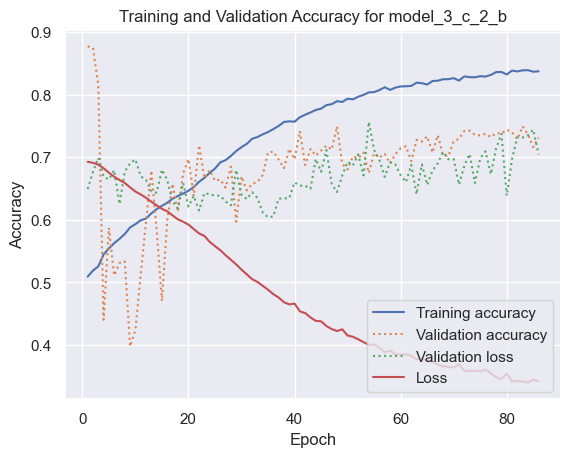

In [26]:
sns.set()
 
acc = hist_3_c_2_b.history['accuracy']
val = hist_3_c_2_b.history['val_accuracy']
loss = hist_3_c_2_b.history['loss']
loss_val = hist_3_c_2_b.history['val_loss']

epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, loss_val, ':', label='Validation loss')
plt.plot(epochs, loss, '-', label="Loss")
plt.title('Training and Validation Accuracy for model_3_c_2_b')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

228/228 [==============================] - 1s 2ms/step


Text(110.44999999999997, 0.5, 'Actual label')

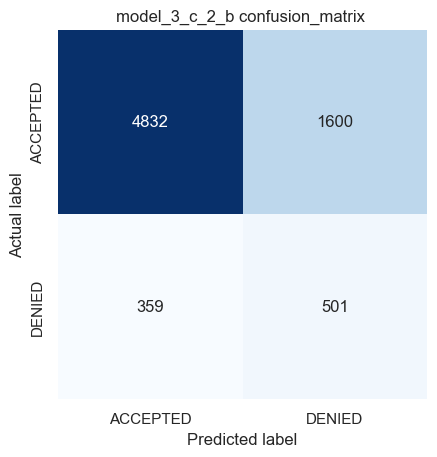

In [27]:

y_predicted = model_3_c_2_b.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model_3_c_2_b confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [28]:
model_3_c_2_b.save("../saved_models/")

INFO:tensorflow:Assets written to: ../saved_models/assets


INFO:tensorflow:Assets written to: ../saved_models/assets


228/228 [==============================] - 1s 2ms/step


Text(110.44999999999997, 0.5, 'Actual label')

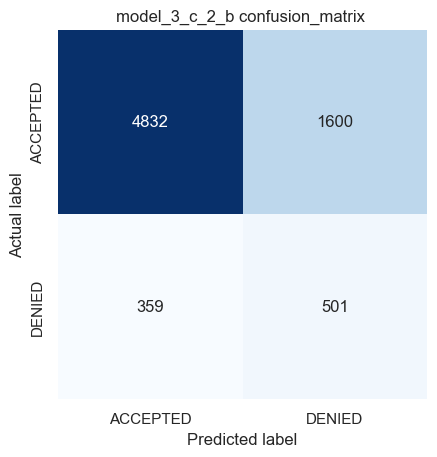

In [29]:
# temp_model = keras.models.load_model("../saved_models/")


# y_predicted = temp_model.predict(x_test) > 0.5
# mat = confusion_matrix(y_test, y_predicted)
# labels = ['ACCEPTED', 'DENIED']
 
# sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
#             xticklabels=labels, yticklabels=labels)

# plt.title("model_3_c_2_b confusion_matrix ")
# plt.xlabel('Predicted label')
# plt.ylabel('Actual label')

model_3_c_1

3 hidden layers with 256 nodes

loss: 0.3614 - accuracy: 0.8279 - val_loss: 0.5912 - val_accuracy: 0.7647

---------------------------------------------------------------------------------------------------------------------------

model_3_c_2

5 hidden layers with 256 nodes

loss: 0.3513 - accuracy: 0.8314 - val_loss: 0.6745 - val_accuracy: 0.7623


---------------------------------------------------------------------------------------------------------------------------

model_3_c_3

4 hidden layers 2 with 512 nodes, 

		1 with 256 nodes, 

		1 with 64 nodes

loss: 0.3465 - accuracy: 0.8332 - val_loss: 0.6345 - val_accuracy: 0.7434



---------------------------------------------------------------------------------------------------------------------------


model_3_c_2_leaky

5 hidden layers with 256 nodes with a leaky activation

loss: 0.4922 - accuracy: 0.7473 - val_loss: 0.7101 - val_accuracy: 0.6089


---------------------------------------------------------------------------------------------------------------------------

model_3_c_2_a

6 hidden layers with 256 nodes with relu activation

loss: 0.3770 - accuracy: 0.8177 - val_loss: 0.6901 - val_accuracy: 0.7449


---------------------------------------------------------------------------------------------------------------------------

model_3_c_2_b

9 hidden layers with 256 nodes

loss: 0.3867 - accuracy: 0.8099 - val_loss: 0.6373 - val_accuracy: 0.7721
